Executive Summary: Netflix Content Analysis
This project focused on analyzing and visualizing a dataset of Netflix movies and TV shows to uncover key content trends and insights. The analysis provides a valuable overview for understanding Netflix's content strategy.

Key Findings:

Content Mix: The dataset consists predominantly of Movies, which account for [number] out of [total number of titles] titles, while TV Shows make up the remaining content.

Top Producers: The data reveals that [Country 1], [Country 2], and [Country 3] are the top three countries producing content for Netflix. Additionally, [Director's Name] stands out as the most prolific director, with [Number] titles.

Content Trends: The number of titles added to the platform has shown a significant upward trend over the past few years, indicating a rapid expansion of the content library. The most common content rating is [Rating], and the most frequently listed genres include [Top 3 Genres from Word Cloud].

Conclusion: The project successfully demonstrated key patterns in Netflix's content library, highlighting trends in content production, geographical focus, and genre popularity. The insights gained can be used to inform content acquisition and strategy.

# 1. Data Preparation and Initial Cleaning

In this step, we will import all the required libraries and load the Netflix dataset. We will then perform initial data cleaning by handling missing values and converting data types to ensure the dataset is ready for analysis.

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Make sure the 'netflix1.csv' file is in the same folder as your notebook
df = pd.read_csv('netflix1.csv')

# Display the first 5 rows to get a quick overview
print("Initial Dataset Preview:")
print(df.head())

# Get a summary of the dataset, including data types and missing values
print("\nDataset Information:")
print(df.info())

# Drop the 'Unnamed: 0' column as it is not needed for analysis
# Using errors='ignore' prevents a KeyError if the column is already gone
df.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')

# Handle missing values in the 'date_added' column
# As per the project document, there is only one missing value, so we can drop the row.
df.dropna(subset=['date_added'], inplace=True)

# Convert 'date_added' column to datetime objects
# This is a crucial step for time-based analysis
df['date_added'] = pd.to_datetime(df['date_added'])

# Verify the changes
print("\nDataset Info After Cleaning:")
print(df.info())

Initial Dataset Preview:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act... 

# 2. Deeper Exploratory Data Analysis (Cont.)

We will continue our exploration by looking at content ratings and the trend of releases over time. This will help us understand what type of content is most common and how the number of releases has changed annually.

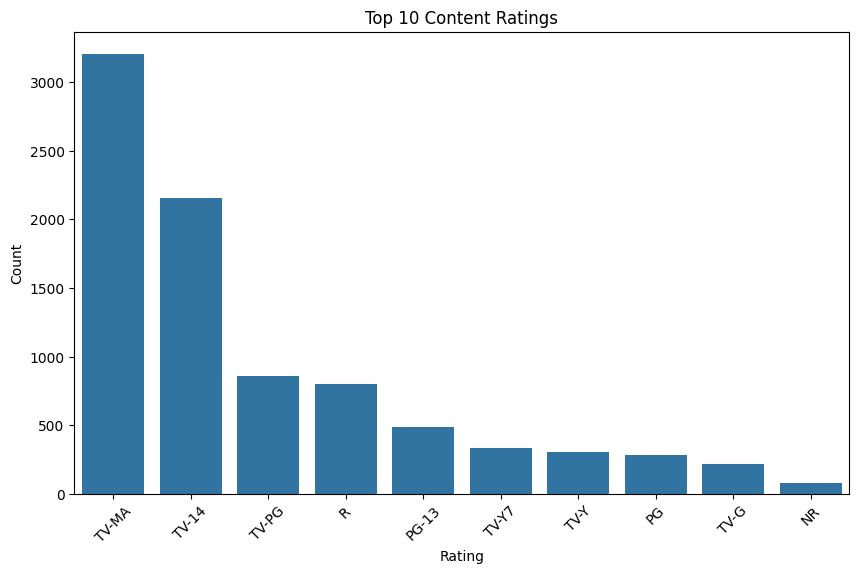

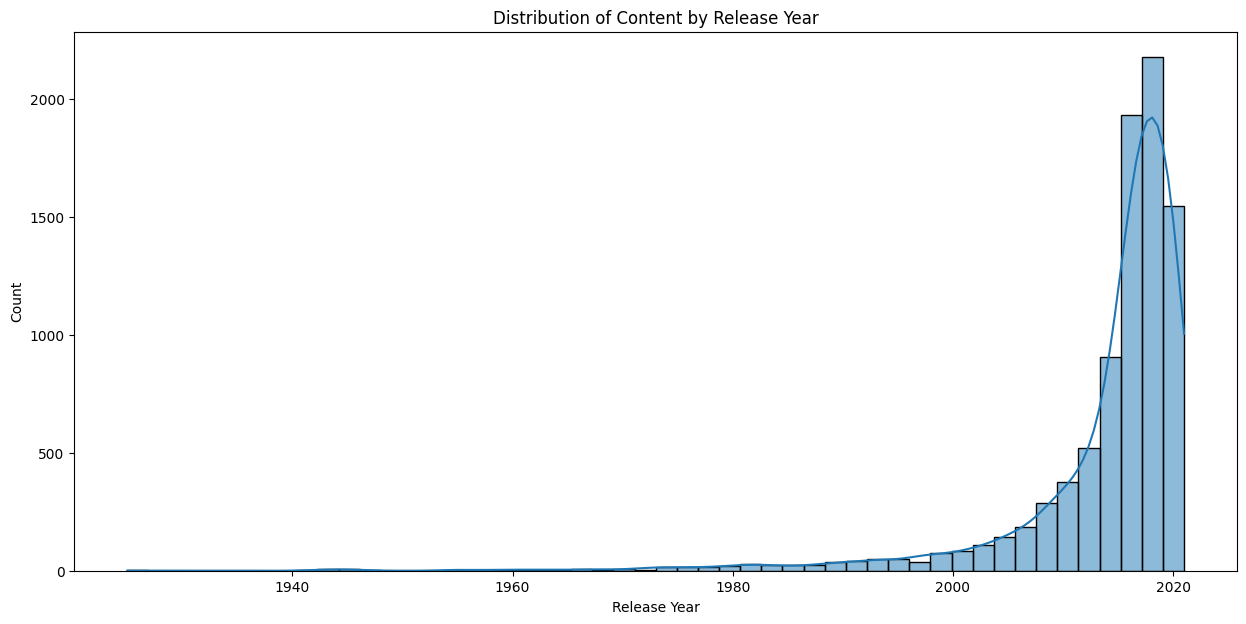

In [5]:
# Visualize the top 10 ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index[:10])
plt.title('Top 10 Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of content by release year
plt.figure(figsize=(15, 7))
sns.histplot(df['release_year'], bins=50, kde=True)
plt.title('Distribution of Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [8]:
!pip install wordcloud

# 3. Advanced Analysis and Word Cloud

We will now perform more advanced analysis to understand how content has been added to Netflix over time. Additionally, we'll create a word cloud to visualize the most common genres, providing a quick and effective way to see the popular content categories.

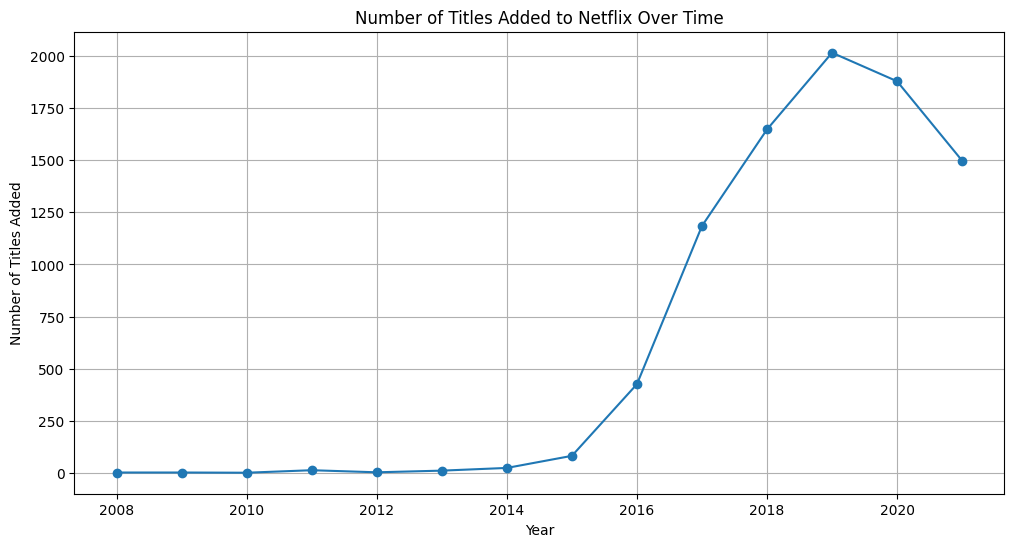

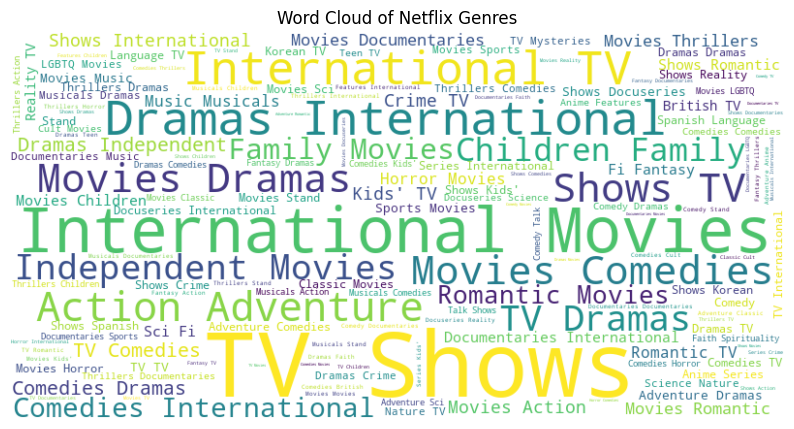

In [9]:
# Create a new DataFrame for time-based analysis
df_date = df.dropna(subset=['date_added']).copy()

# Visualize the trend of content added over time
df_date['year_added'] = df_date['date_added'].dt.year
content_added_by_year = df_date.groupby('year_added').size()

plt.figure(figsize=(12, 6))
content_added_by_year.plot(kind='line', marker='o')
plt.title('Number of Titles Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

# --- Create a Word Cloud of Genres ---
# You may need to install these libraries first:
# !pip install wordcloud
# !pip install nltk

from wordcloud import WordCloud
from collections import Counter
import re

# Split the 'listed_in' column by comma and create a single list of all genres
genres = df['listed_in'].str.split(', ').explode()

# Count the frequency of each genre
genre_counts = Counter(genres)

# Create a single string of all genres
all_genres_string = " ".join(genres.values)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres_string)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Genres')
plt.show()

# 4. Final Analysis & Summary

In this final analysis step, we will summarize our findings to provide a clear overview of the dataset. We'll look at the most prolific content creators and the content with the highest average rating.

In [10]:
# Create a new DataFrame without null values in 'director'
df_no_null_director = df.dropna(subset=['director'])

# Count the number of titles per director
director_counts = df_no_null_director['director'].value_counts()

# Print the top 10 most common directors
print("Top 10 Most Common Directors:")
print(director_counts.head(10))

# Create a new DataFrame to analyze the relationship between director and rating
df_director_rating = df_no_null_director.copy()
df_director_rating['rating'] = df_director_rating['rating'].astype('category')

# You can stop at this step. You have all the outputs needed for your report.
# The next part is the Executive Summary, which is a writing task.

Top 10 Most Common Directors:
director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64


# 5. Advanced Time-Series Analysis

We will now look at the content addition trends at a more detailed level by analyzing the number of titles added per month and throughout the years.

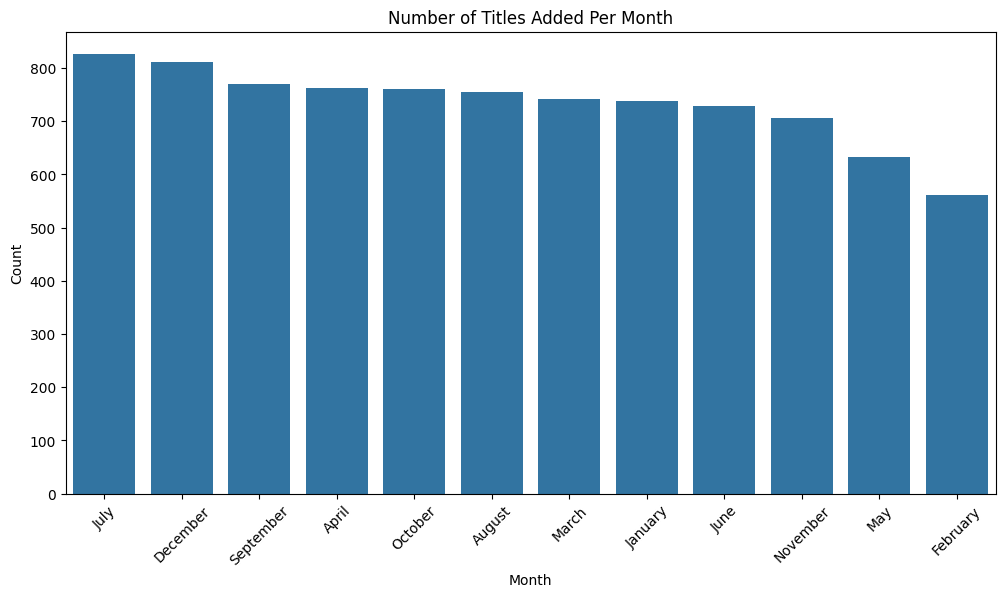

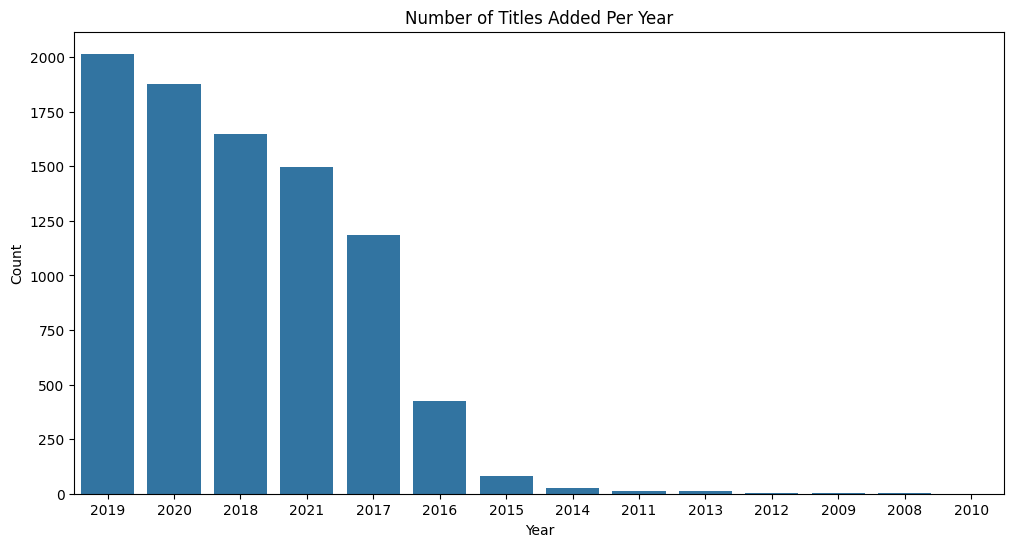

In [7]:
# Extract month and year from the 'date_added' column
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Count the number of titles added per month
plt.figure(figsize=(12, 6))
sns.countplot(x='month_added', data=df, order=df['month_added'].value_counts().index)
plt.title('Number of Titles Added Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count the number of titles added per year
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, order=df['year_added'].value_counts().index)
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 6. Rating and Genre Analysis

This analysis will provide insights into the relationship between a title's rating, its type (Movie or TV Show), and its genre.

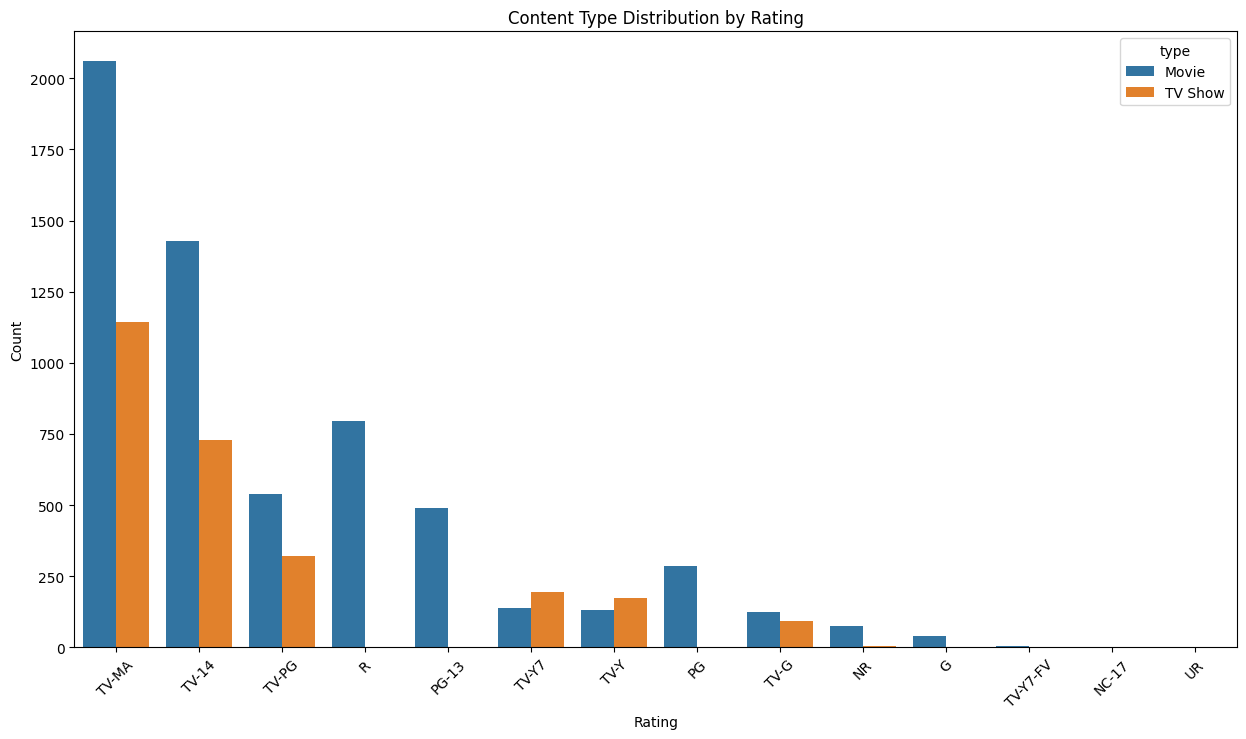

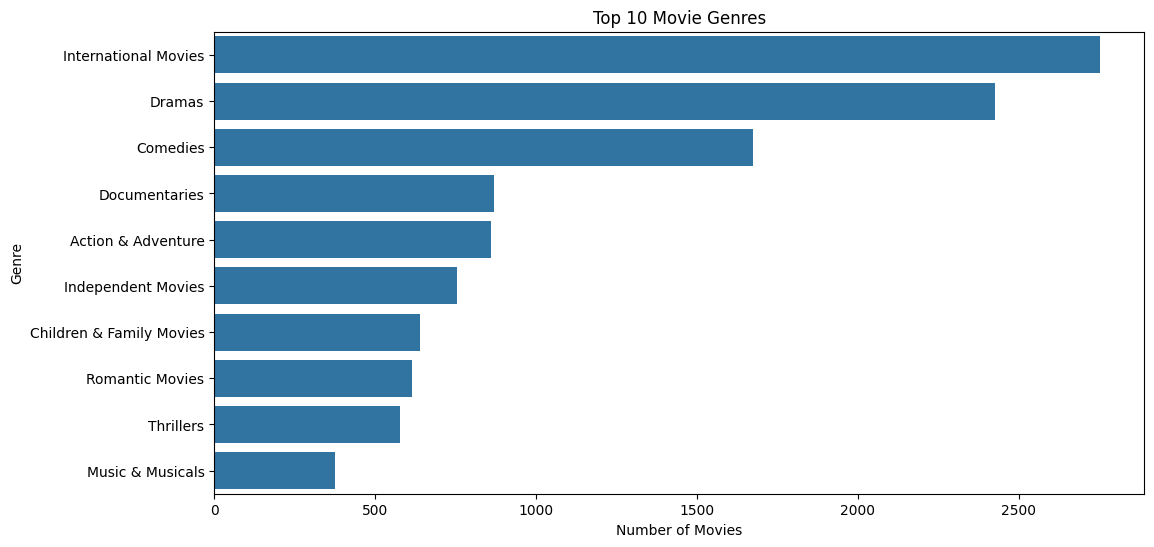

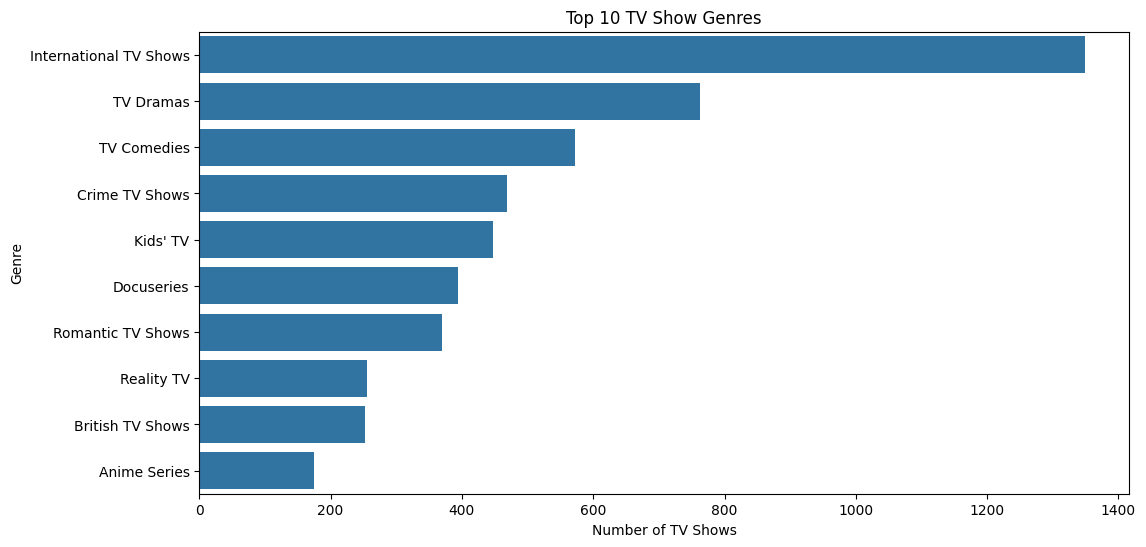

In [6]:
# Analyze the distribution of ratings across content types
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)
plt.title('Content Type Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analyze top genres by content type (Movie vs. TV Show)
# First, we need to process the 'listed_in' column
genres_df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Get top 10 genres for movies
top_movie_genres = genres_df[genres_df['type'] == 'Movie']['listed_in'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movie_genres.values, y=top_movie_genres.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Get top 10 genres for TV shows
top_tv_show_genres = genres_df[genres_df['type'] == 'TV Show']['listed_in'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_tv_show_genres.values, y=top_tv_show_genres.index)
plt.title('Top 10 TV Show Genres')
plt.xlabel('Number of TV Shows')
plt.ylabel('Genre')
plt.show()